# 第 3 章 記述統計

『Python による統計分析入門』（オーム社、2018 年）第 3 章の読書ノート。

## 3.1 いろいろな量・データの種類

* 定性的データと定量的データの違いとは何か？→値の大きさ、量の意味の有無によって説明できる。意味がないほうが定性的データだ。
* 定性的データの分類とは何か？ →名義尺度、順序尺度。
* 順序尺度と名義尺度のそれぞれの意味は何か？ 
* 定量的データの分類とは何か？→間隔尺度、比例尺度。
* 間隔尺度と比例尺度のそれぞれの意味は何か？

## 3.2 平均
* データ全体を表現する指標にはどのようなものがあるか？→平均、分布、etc.
* データ全体の代表値にはどのようなものがあるか？→平均値、中央値、最頻値。
* 平均にはどのようなものがあるか？
  * トリム平均とは何か？
* データの要素数が偶数のときの中央値の定義はどうなるか？→中央値候補値二つを足して 2 で割る。
* 最頻値がデータ内に複数ある場合はどのように扱うか？→Python の `statistics.mode` では例外が送出される。

Python ではこのような代表値を計算するのに `statistics` モジュールの関数が利用できる。

In [1]:
from statistics import mean, median, mode
print(mean([168.3, 179.2, 165.8]))
print(median([168.3, 179.2, 165.8]))
print(mode([19, 21, 19, 20, 22, 19, 20, 21, 20, 20]))

171.1
168.3
20


幾何平均（相乗平均）、トリム平均は `scipy.stats` モジュールの関数 `gmean`, `trim_mean` を利用できる。トリムについては説明がいる。元データの最小値側と最大値側の要素を割合指定で除外するという加工を意味する。

## 3.3 頻度分布・分散・偏差
### 3.3.1 頻度分布

* ヒストグラムとは何か？→棒グラフのような図式化であり、あるデータ内の各要素が出現する頻度をカウントしたもの。
* ヒストグラムの階級数の目安は何か？→Stirges の式を使う。$1 + \log_2 n$

### 3.3.2 四分位範囲と箱ひげ図

* 四分位範囲とは何か？→データ全体をソートし、四等分して要素がどの範囲にいるのかを示すもの。
* 箱ひげ図とは何か？→四分位範囲を図式的に表現するもの。

### 3.3.3 分散

* **分散**とは何か？→分散とはデータの散らばり具合を示す指標で、$\dfrac{\sum_i (x_i - \mu)^2}{n}$ で定義される。ここで $\mu$ は全要素の相加平均とする。
* **標準偏差**とは何か？→分散の平方根をとったもの。
* **正規分布**とは何か？

  これについては第 4 章で採り上げるから後回し。

### 3.3.4 Python で頻度分布図を描く

Jupyter Notebook の環境でプロット等をインラインで表示するには、次の命令が必要：

In [2]:
%matplotlib inline

ヒストグラムを描画する。本書のデータが手許にないので、差し当たり学生 74 人の百点満点のテストの成績を表すリストを適当にでっちあげる。

In [3]:
from random import randint
x = [randint(0, 101) for _ in range(74)]

Matplotlib でヒストグラムを描画する。慣れれば何も見ないでプロットできるようになる。ラベルに日本語を指定しているが、私の環境では文字が豆腐になる。本ノートではあえてそのままにしておく。

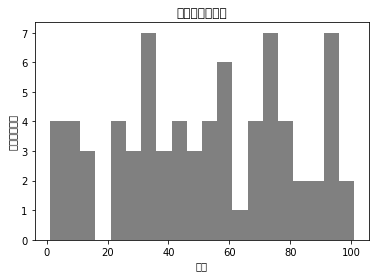

In [4]:
import matplotlib.pyplot as plt
plt.hist(x, bins=20, color='gray')
plt.title('成績の頻度分布')
plt.xlabel('点数')
plt.ylabel('人数（頻度）')
plt.show()

### 3.3.5 Python で箱ひげ図を描く

同データの分散と標準偏差を求め、箱ひげ図を描画する。

* 本書では NumPy を利用しているが、本ノートでは Python 標準の関数を利用してみる。
* 箱ひげ図を描画するためには Matplotlib の `boxplot` を利用する。

variance: 801.1973
std-deviation: 28.3054


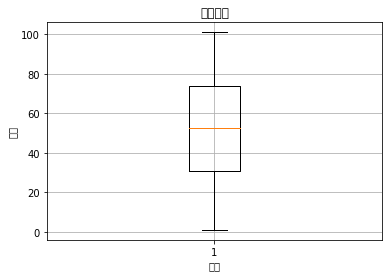

In [5]:
from statistics import variance, stdev

print(f'variance: {variance(x):.4f}')
print(f'std-deviation: {stdev(x):.4f}')

plt.boxplot(x)
plt.title('箱ひげ図')
plt.grid()
plt.xlabel('科目')
plt.ylabel('点数')
plt.show()